In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
TEST_SIZE = 0.3
SEED = 1000

In [3]:
df = pd.read_csv('/kaggle/input/cropland-mapping/WinnipegDataset.txt', sep=',')

In [4]:
df.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


<AxesSubplot: title={'center': 'target hist'}, xlabel='label', ylabel='Count'>

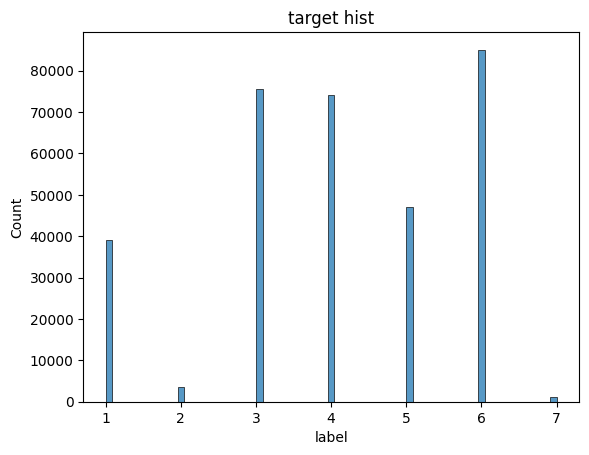

In [5]:
plt.title("target hist")
sb.histplot(data=df, x=df.label)

<Figure size 4000x6000 with 0 Axes>

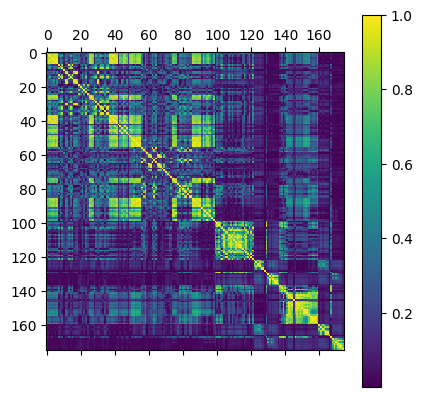

In [6]:
corr_matrix = df.corr().abs()
fig = plt.figure(figsize=(40,60))
plt.matshow(corr_matrix)
cb = plt.colorbar()
plt.show()

In [7]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)

<Figure size 4000x6000 with 0 Axes>

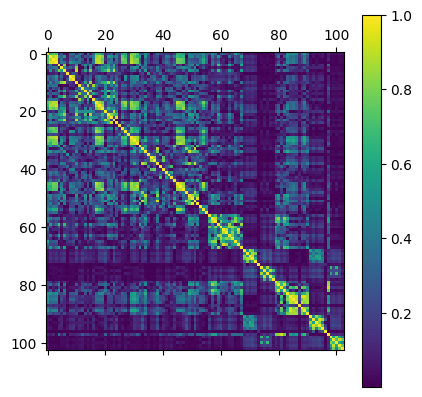

In [8]:
corr_matrix = df.corr().abs()
fig = plt.figure(figsize=(40,60))
plt.matshow(corr_matrix)
cb = plt.colorbar()
plt.show()

In [9]:
df.shape

(325834, 103)

In [10]:
X = df[df.columns[1:]]
y = df[df.columns[:1]]

In [11]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=SEED)

In [13]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

Тк классов несколько используется схема обучения One vs Rest

In [15]:
clf = LogisticRegression(class_weight='balanced',n_jobs=-1, verbose=1, max_iter=1000)

In [16]:
clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          721     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43829D+05    |proj g|=  2.60449D+05


 This problem is unconstrained.



At iterate   50    f=  1.14359D+04    |proj g|=  7.44183D+02

At iterate  100    f=  8.80396D+03    |proj g|=  1.06128D+03

At iterate  150    f=  7.92638D+03    |proj g|=  2.66186D+02

At iterate  200    f=  7.49855D+03    |proj g|=  1.10258D+02

At iterate  250    f=  7.26984D+03    |proj g|=  8.91171D+01

At iterate  300    f=  7.13871D+03    |proj g|=  3.34907D+02

At iterate  350    f=  7.05652D+03    |proj g|=  1.54285D+02

At iterate  400    f=  6.98593D+03    |proj g|=  1.40572D+02

At iterate  450    f=  6.94694D+03    |proj g|=  8.65063D+01

At iterate  500    f=  6.91622D+03    |proj g|=  1.30299D+02

At iterate  550    f=  6.89311D+03    |proj g|=  6.53613D+01

At iterate  600    f=  6.87403D+03    |proj g|=  1.62332D+02

At iterate  650    f=  6.86196D+03    |proj g|=  9.64207D+01

At iterate  700    f=  6.85221D+03    |proj g|=  5.15828D+01

At iterate  750    f=  6.84591D+03    |proj g|=  3.49355D+01

At iterate  800    f=  6.84077D+03    |proj g|=  2.93947D+01

At iter

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.8min finished


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1, verbose=1)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [18]:
y_pred = clf.predict(X_test)
metrics = pd.DataFrame(index = ['precision','recall','f1'])
metrics['LR(OVR)'] = [
    precision_score(y_test, y_pred, average='macro'),
    recall_score(y_test, y_pred,average='macro'),
    f1_score(y_test, y_pred, average='macro'),
      ]
metrics

,LR(OVR)
precision,0.965539
recall,0.989840
f1,0.976642


Text(0.5, 1.0, 'Confusion matrix')

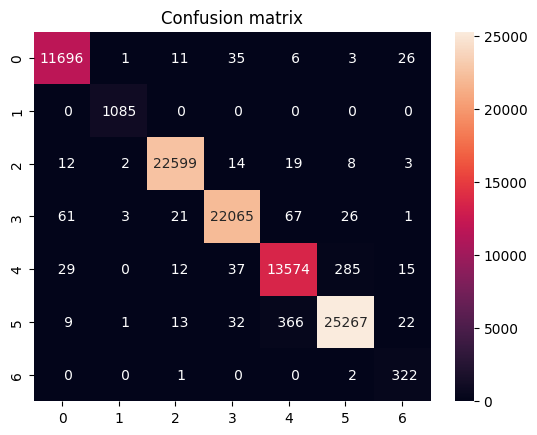

In [19]:
conf_mx = confusion_matrix(y_test, y_pred)

sb.heatmap(conf_mx, annot=True, fmt="4.0f")
plt.title("Confusion matrix", size=12)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf2 = RandomForestClassifier(n_jobs=-1, verbose=1)
clf2.fit(X_train, y_train)

/tmp/ipykernel_21/2195160668.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train, y_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.8min finished


RandomForestClassifier(n_jobs=-1, verbose=1)

In [22]:
y_pred = clf2.predict(X_test)
metrics['RF'] = [
    precision_score(y_test, y_pred, average='macro'),
    recall_score(y_test, y_pred,average='macro'),
    f1_score(y_test, y_pred, average='macro'),
      ]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


In [23]:
metrics

,LR(OVR),RF
precision,0.965539,0.986440
recall,0.989840,0.993227
f1,0.976642,0.989734


Text(0.5, 1.0, 'Confusion matrix')

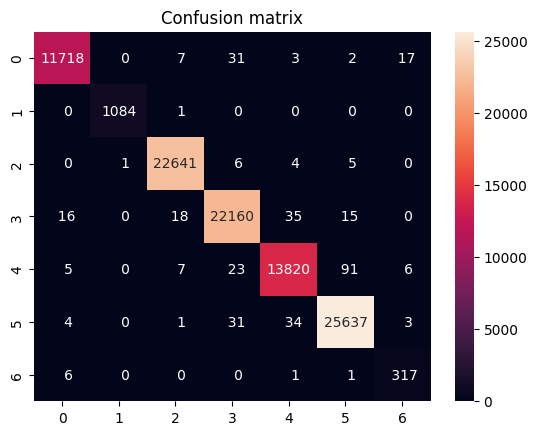

In [24]:
conf_mx = confusion_matrix(y_test, y_pred)

sb.heatmap(conf_mx, annot=True, fmt="4.0f")
plt.title("Confusion matrix", size=12)